In [1]:
import nltk

# 10
Train a unigram tagger and run it on some new text. Observe that some words are not
assigned a tag. Why not?

In [5]:
from nltk.corpus import brown

In [6]:
sents = brown.tagged_sents(categories="lore")

In [7]:
tagger = nltk.UnigramTagger(sents)

In [10]:
tagger.tag(brown.sents(categories="learned")[100])

[('The', 'AT'),
 ('use', 'NN'),
 ('of', 'IN'),
 ('high', 'JJ'),
 ('voltages', None),
 ('and', 'CC'),
 ('low', 'JJ'),
 ('currents', None),
 ('by', 'IN'),
 ('proper', 'JJ'),
 ('design', 'NN'),
 ('to', 'TO'),
 ('reduce', 'VB'),
 ('electron', None),
 ('heat', 'NN'),
 ('transfer', 'NN'),
 ('to', 'TO'),
 ('the', 'AT'),
 ('anode', None),
 ('for', 'IN'),
 ('a', 'AT'),
 ('given', 'VBN'),
 ('power', 'NN'),
 ('output', 'NN'),
 ('.', '.')]

# 11
Learn about the affix tagger (type help(nltk.AffixTagger)). Train an affix tagger and
run it on some new text. Experiment with different settings for the affix length and the
minimum word length. Discuss your findings.

In [11]:
help(nltk.AffixTagger)

Help on class AffixTagger in module nltk.tag.sequential:

class AffixTagger(ContextTagger)
 |  AffixTagger(train=None, model=None, affix_length=-3, min_stem_length=2, backoff=None, cutoff=0, verbose=False)
 |  
 |  A tagger that chooses a token's tag based on a leading or trailing
 |  substring of its word string.  (It is important to note that these
 |  substrings are not necessarily "true" morphological affixes).  In
 |  particular, a fixed-length substring of the word is looked up in a
 |  table, and the corresponding tag is returned.  Affix taggers are
 |  typically constructed by training them on a tagged corpus.
 |  
 |  Construct a new affix tagger.
 |  
 |  :param affix_length: The length of the affixes that should be
 |      considered during training and tagging.  Use negative
 |      numbers for suffixes.
 |  :param min_stem_length: Any words whose length is less than
 |      min_stem_length+abs(affix_length) will be assigned a
 |      tag of None by this tagger.
 |  
 |  Me

## 14
Use sorted() and set() to get a sorted list of tags used in the Brown corpus, removing
duplicates

In [13]:
print(sorted(set(t for w, t in brown.tagged_words(categories='news'))))

["'", "''", '(', '(-HL', ')', ')-HL', '*', '*-HL', ',', ',-HL', '--', '.', '.-HL', ':', ':-HL', 'ABL', 'ABN', 'ABN-HL', 'ABX', 'AP', 'AP$', 'AP-HL', 'AP-TL', 'AT', 'AT-HL', 'AT-TL', 'BE', 'BE-HL', 'BED', 'BED*', 'BEDZ', 'BEDZ*', 'BEDZ-HL', 'BEG', 'BEM', 'BEN', 'BER', 'BER*', 'BER-HL', 'BER-TL', 'BEZ', 'BEZ*', 'BEZ-HL', 'CC', 'CC-HL', 'CC-TL', 'CD', 'CD$', 'CD-HL', 'CD-TL', 'CS', 'CS-HL', 'DO', 'DO*', 'DO-HL', 'DOD', 'DOD*', 'DOZ', 'DOZ*', 'DT', 'DT$', 'DT+BEZ', 'DT-HL', 'DTI', 'DTI-HL', 'DTS', 'DTX', 'EX', 'EX+BEZ', 'FW-*', 'FW-AT', 'FW-AT-HL', 'FW-AT-TL', 'FW-CC', 'FW-CD', 'FW-DT', 'FW-IN', 'FW-IN+AT-TL', 'FW-IN+NN', 'FW-IN+NN-TL', 'FW-IN-TL', 'FW-JJ', 'FW-JJ-TL', 'FW-NN', 'FW-NN-TL', 'FW-NNS', 'FW-PP$-NC', 'FW-VB', 'FW-VB-NC', 'FW-WDT', 'HV', 'HVD', 'HVD*', 'HVD-HL', 'HVG', 'HVN', 'HVZ', 'HVZ*', 'IN', 'IN-HL', 'IN-TL', 'JJ', 'JJ-HL', 'JJ-NC', 'JJ-TL', 'JJR', 'JJR-HL', 'JJR-NC', 'JJR-TL', 'JJS', 'JJS-TL', 'JJT', 'JJT-HL', 'MD', 'MD*', 'MD*-HL', 'MD+HV', 'MD-HL', 'MD-TL', 'NN', 'NN$', 

## 15
Write programs to process the Brown Corpus and find answers to the following
questions:
1. Which nouns are more common in their plural form, rather than their singular
form? (Only consider regular plurals, formed with the -s suffix.)
2. Which word has the greatest number of distinct tags. What are they, and what do
they represent?
3. List tags in order of decreasing frequency. What do the 20 most frequent tags
represent?
4. Which tags are nouns most commonly found after? What do these tags represent?

In [36]:
tagged_words = [(w.lower(), t) for w, t in brown.tagged_words(categories='news')]
nouns = [w for w, t in tagged_words if t.startswith('NN')]
fdist = nltk.FreqDist(nouns)
for w in set(nouns):
    if fdist[w+'s'] > fdist[w]:
        print("{:<20}".format(w), "| Plural:", fdist[w+'s'], "| Singular:", fdist[w])

fan                  | Plural: 3 | Singular: 2
spectator            | Plural: 5 | Singular: 2
commitment           | Plural: 3 | Singular: 2
call                 | Plural: 7 | Singular: 4
method               | Plural: 10 | Singular: 3
twin                 | Plural: 3 | Singular: 2
outsider             | Plural: 2 | Singular: 1
acre                 | Plural: 10 | Singular: 2
fee                  | Plural: 13 | Singular: 7
design               | Plural: 10 | Singular: 6
official             | Plural: 14 | Singular: 6
restriction          | Plural: 3 | Singular: 1
language             | Plural: 3 | Singular: 2
arrangement          | Plural: 4 | Singular: 2
destroyer            | Plural: 2 | Singular: 1
sport                | Plural: 10 | Singular: 2
talk                 | Plural: 7 | Singular: 3
shade                | Plural: 2 | Singular: 1
soldier              | Plural: 2 | Singular: 1
trustee              | Plural: 5 | Singular: 1
raise                | Plural: 3 | Singular: 1
grant  

In [38]:
cfd = nltk.ConditionalFreqDist(tagged_words)
for word in cfd.conditions():
    if len(cfd[word]) > 3:
        print(word, list(cfd[word]), len(cfd[word]))

no ['AT', 'RB', 'AT-HL', 'AT-TL'] 4
that ['CS', 'WPS', 'DT', 'QL', 'WPO'] 5
place ['NN', 'VB', 'NN-TL', 'NP'] 4
in ['IN', 'RP', 'IN-HL', 'IN-TL'] 4
for ['IN', 'IN-TL', 'IN-HL', 'CS', 'RB'] 5
by ['IN', 'IN-HL', 'IN-TL', 'RB'] 4
to ['TO', 'IN', 'IN-HL', 'TO-HL', 'IN-TL', 'TO-TL', 'NPS'] 7
only ['RB', 'AP', 'JJ', 'QL'] 4
a ['AT', 'AT-HL', 'NN', 'AT-TL', 'FW-IN'] 5
act ['VB', 'NN', 'NN-TL', 'NN-HL'] 4
end ['NN', 'VB', 'NN-TL', 'NN-HL'] 4
on ['IN', 'IN-TL', 'RP', 'IN-HL'] 4
best ['JJT', 'RBT', 'JJT-HL', 'VB', 'NP-TL'] 5
cost ['NN', 'NN-HL', 'VB', 'VBD'] 4
as ['CS', 'IN', 'QL', 'CS-HL'] 4
major ['JJ', 'NN-TL', 'NP', 'NN'] 4
general ['JJ', 'NN', 'JJ-TL', 'NN-TL'] 4
fair ['JJ', 'NN', 'JJ-HL', 'NN-TL', 'JJ-TL'] 5
plan ['NN', 'VB', 'NN-HL', 'NN-TL'] 4
police ['NNS-TL', 'NN', 'NNS', 'NNS-HL'] 4
more ['AP', 'AP-HL', 'QL', 'RBR'] 4
home ['NR', 'NN', 'NN-HL', 'NN-TL', 'NR-HL', 'NP'] 6
back ['RB', 'VB', 'NN', 'RB-HL', 'RB-TL'] 5
present ['JJ', 'RB', 'NN', 'VB'] 4
held ['VBN', 'VBD', 'VBN-HL', 'VBD-HL

In [39]:
tags = [t for w, t in tagged_words]
print(nltk.FreqDist(tags).most_common(20))

[('NN', 13162), ('IN', 10616), ('AT', 8893), ('NP', 6866), (',', 5133), ('NNS', 5066), ('.', 4452), ('JJ', 4392), ('CC', 2664), ('VBD', 2524), ('NN-TL', 2486), ('VB', 2440), ('VBN', 2269), ('RB', 2166), ('CD', 2020), ('CS', 1509), ('VBG', 1398), ('TO', 1237), ('PPS', 1056), ('PP$', 1051)]


In [42]:
tag_before_NN = [t1 for (w1, t1), (w2, t2) in nltk.bigrams(tagged_words) if t2.startswith('NN')]
for t, n in nltk.FreqDist(tag_before_NN).most_common(20):
    print("{:<8}{:}".format(t, n))

AT      5194
JJ      2996
NN      2180
IN      1928
CD      785
NN-TL   776
PP$     719
AP      518
CC      506
NP-TL   466
NP      461
.       441
,       441
JJ-TL   426
VBG     379
DT      323
VBN     291
VB      248
OD      159
VBD     157


# 16
Explore the following issues that arise in connection with the lookup tagger:
1. What happens to the tagger performance for the various model sizes when a
backoff tagger is omitted?
2. Consider the curve in 4.2; suggest a good size for a lookup tagger that balances
memory and performance. Can you come up with scenarios where it would be
preferable to minimize memory usage, or to maximize performance with no
regard for memory usage?

## 17
What is the upper limit of performance for a lookup tagger, assuming no limit to the
size of its table? (Hint: write a program to work out what percentage of tokens of a word
are assigned the most likely tag for that word, on average.)

In [45]:
tagged_words = brown.tagged_words(categories="learned")
tagged_words = [(w.lower(), t) for w, t in tagged_words]
cfd = nltk.ConditionalFreqDist(tagged_words)
print(len(cfd)/sum([len(tags) for word in cfd.conditions() for tags in cfd[word]]))

0.31390207293821754


# 18
 Generate some statistics for tagged data to answer the following questions:
1. What proportion of word types are always assigned the same part-of-speech tag?
2. How many words are ambiguous, in the sense that they appear with at least two
tags?
3. What percentage of word tokens in the Brown Corpus involve these ambiguous
words?

In [47]:
tagged_words = brown.tagged_words(categories="news")
tagged_words = [(w.lower(), t) for w, t in tagged_words]
cfd = nltk.ConditionalFreqDist(tagged_words)
print(len([w for w in cfd.conditions() if len(cfd[w]) == 1]) / len(cfd))

0.8348078096400244


In [50]:
print(len([w for w in cfd.conditions() if len(cfd[w]) >= 2]) / len(cfd))

0.1651921903599756


# 19
The evaluate() method works out how accurately the tagger performs on this text. For
example, if the supplied tagged text was [( 'the' , 'DT' ), ( 'dog' , 'NN' )] and the tagger
produced the output [( 'the' , 'NN' ), ( 'dog' , 'NN' )], then the score would be 0.5. Let's
try to figure out how the evaluation method works:
1. A tagger t takes a list of words as input, and produces a list of tagged words as
output. However, t.evaluate() is given correctly tagged text as its only parameter.
What must it do with this input before performing the tagging?
2. Once the tagger has created newly tagged text, how might the evaluate() method
go about comparing it with the original tagged text and computing the accuracy
score?
3. Now examine the source code to see how the method is implemented. Inspect
nltk.tag.api.__file__ to discover the location of the source code, and open this file
using an editor (be sure to use the api.py file and not the compiled api.pyc binary
file).

In [52]:
nltk.tag.api.__file__

'C:\\ProgramData\\Anaconda3\\lib\\site-packages\\nltk\\tag\\api.py'

# 20
 Write code to search the Brown Corpus for particular words and phrases according to
tags, to answer the following questions:
1. Produce an alphabetically sorted list of the distinct words tagged as MD.
2. Identify words that can be plural nouns or third person singular verbs (e.g. deals,
flies).
3. Identify three-word prepositional phrases of the form IN + DET + NN (eg. in the
lab).
4. What is the ratio of masculine to feminine pronouns?

In [1]:
import nltk
from nltk.corpus import brown

tagged_words = brown.tagged_words(categories=["learned", "news", "fiction"])
MD_list = sorted(set(w for (w, t) in tagged_words if t == "MD"))

In [14]:
print(MD_list)

['Can', 'Could', 'Should', 'Will', 'Would', 'can', 'could', 'may', 'might', 'must', 'need', 'ought', 'shall', 'should', 'will', 'would']


In [15]:
ends_s = [(w, t) for (w, t) in tagged_words if w.endswith("s")]
cfd = nltk.ConditionalFreqDist(ends_s)
for word in cfd.conditions():
    if "VBZ" in cfd[word] and "NNS" in cfd[word]:
        print(word)

answers
stands
shows
services
needs
means
plans
remains
bars
points
calls
numbers
states
costs
moves
approaches
lives
lists
strikes
hopes
marks
ends
wonders
causes
runs
plays
colors
stems
works
snatches
leaves
faces
wishes
passes
acts
subjects
clouds
estimates


In [24]:
for (w1, t1), (w2, t2), (w3, t3) in nltk.trigrams(tagged_words):
    if t1 == "IN" and t2 == "DET" and t3 == "NN":
        print(w1, w2, w3)

In [2]:
tagged_words = [(w.lower(), t) for w, t in tagged_words]
male = [w for w, t in tagged_words if w in ["he", "his", "him", "himself"]]
female = [w for w, t in tagged_words if w in ["she", "her", "herself"]]
print("proportion of masculine to feminine is {:.0%}".format(len(male)/len(female)))

proportion of masculine to feminine is 373%


# 21
 In 3.1 we saw a table involving frequency counts for the verbs adore, love, like, prefer
and preceding qualifiers absolutely and definitely. Investigate the full range of adverbs
that appear before these four verbs.

In [32]:
cfd = nltk.ConditionalFreqDist([(w1, w2) for (w1, t1), (w2, t2) in nltk.bigrams(tagged_words) 
                                if w2 in ['adore', 'love', 'like', 'prefer'] and t1 == "RB" and t2.startswith("VB")])
cfd.tabulate()

       like love 
always    1    0 
dearly    0    1 
simply    1    0 


# 22
 We defined the regexp_tagger that can be used as a fall-back tagger for unknown
words. This tagger only checks for cardinal numbers. By testing for particular prefix or
suffix strings, it should be possible to guess other tags. For example, we could tag any
word that ends with -s as a plural noun. Define a regular expression tagger (using
RegexpTagger()) that tests for at least five other patterns in the spelling of words. (Use
inline documentation to explain the rules.)

In [5]:
patterns = [(r".+ion$", "NN"),
            (r".+ly$", "RB"), 
            (r".+ous$", "JJ"),
            (r".+ify$", "VB"),
            (r".+s$", "NNS")]
reg_tagger = nltk.RegexpTagger(patterns)

# 23
Consider the regular expression tagger developed in the exercises in the previous
section. Evaluate the tagger using its accuracy() method, and try to come up with ways to
improve its performance. Discuss your findings. How does objective evaluation help in
the development process?

In [11]:
tagged_sents = brown.tagged_sents(categories=["learned", "news", "fiction"])
test_sents = brown.tagged_sents(categories="editorial")
t0 = nltk.DefaultTagger("NN")
t1 = nltk.RegexpTagger(patterns, backoff=t0)
t2 = nltk.UnigramTagger(tagged_sents, backoff=t1)
t3 = nltk.BigramTagger(tagged_sents, backoff=t2)
t3.evaluate(test_sents)

0.889796117135251

# 24
 How serious is the sparse data problem? Investigate the performance of n-gram taggers
as n increases from 1 to 6. Tabulate the accuracy score. Estimate the training data
required for these taggers, assuming a vocabulary size of 10 5 and a tagset size of 10 2 .

In [15]:
t0 = nltk.DefaultTagger("NN")
t1 = nltk.UnigramTagger(tagged_sents, backoff=t0)
t2 = nltk.BigramTagger(tagged_sents, backoff=t1)
t3 = nltk.TrigramTagger(tagged_sents, backoff=t2)
t4 = nltk.NgramTagger(4, tagged_sents, backoff=t3)
t5 = nltk.NgramTagger(5, tagged_sents, backoff=t4)
t6 = nltk.NgramTagger(6, tagged_sents, backoff=t5)

In [16]:
for i in range(1, 7):
    print("t" + str(i) + " Accuracy: " + str(eval("t" + str(i) + ".evaluate(test_sents)")))

t1 Accuracy: 0.8689533147198234
t2 Accuracy: 0.8820855788585157
t3 Accuracy: 0.8818096227517693
t4 Accuracy: 0.8803486786572301
t5 Accuracy: 0.8798779300045452
t6 Accuracy: 0.8796993701707682


# 25
Obtain some tagged data for another language, and train and evaluate a variety of
taggers on it. If the language is morphologically complex, or if there are any orthographic
clues (e.g. capitalization) to word classes, consider developing a regular expression
tagger for it (ordered after the unigram tagger, and before the default tagger). How does
the accuracy of your tagger(s) compare with the same taggers run on English data?
Discuss any issues you encounter in applying these methods to the language.

 # 26
4.1 plotted a curve showing change in the performance of a lookup tagger as the model
size was increased. Plot the performance curve for a unigram tagger, as the amount of
training data is varied.

In [19]:
uni_tagger = nltk.UnigramTagger(tagged_sents)
score = []
sents = []
for category in brown.categories()[:-1]:
    sents += brown.tagged_sents(categories=category)
    tagger = nltk.UnigramTagger(sents)
    score.append(tagger.evaluate(brown.tagged_sents(categories=brown.categories()[-1])))

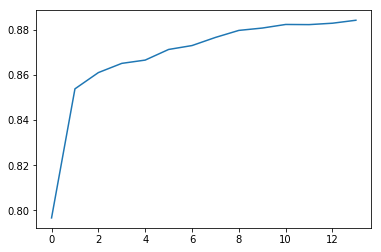

In [21]:
import matplotlib.pyplot as plt
plt.plot(score)
plt.show()

# 27
 Inspect the confusion matrix for the bigram tagger t2 defined in 5, and identify one or
more sets of tags to collapse. Define a dictionary to do the mapping, and evaluate the
tagger on the simplified data.

In [24]:
tagged_words = brown.tagged_words(categories=["news", "editorial", "fiction"])
words = [word for (word, tag) in tagged_words]
test_tags = [tag for word, tag in t2.tag(words)]
gold_tags = [tag for word, tag in tagged_words]
print(nltk.ConfusionMatrix(gold_tags, test_tags))

            |                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                 F           F                                                                                                                                                                                                                                                                                                                                                                                                                                             

# 28
Experiment with taggers using the simplified tagset (or make one of your own by
discarding all but the first character of each tag name). Such a tagger has fewer
distinctions to make, but much less information on which to base its work. Discuss your
findings.

# 29
Recall the example of a bigram tagger which encountered a word it hadn't seen during
training, and tagged the rest of the sentence as None. It is possible for a bigram tagger to
fail part way through a sentence even if it contains no unseen words (even if the sentence
was used during training). In what circumstance can this happen? Can you write a
program to find some examples of this?

In [25]:
print("The case where some words do not appear as a pair as seen in training sets")

The case where some words do not appear as a pair as seen in training sets


# 30
 Preprocess the Brown News data by replacing low frequency words with UNK, but
leaving the tags untouched. Now train and evaluate a bigram tagger on this data. How
much does this help? What is the contribution of the unigram tagger and default tagger
now?

In [19]:
from collections import defaultdict

In [52]:
mapping = defaultdict(lambda: "UNK")
tagged_sents = brown.tagged_sents(categories='news')
fd = nltk.FreqDist(w for sent in tagged_sents for w, t in sent)
for w, _ in fd.most_common(1000):
    mapping[w] = w
replaced = [[(mapping[w], t) for w, t in sent] for sent in tagged_sents]
t2 = nltk.BigramTagger(replaced)
t2.evaluate(brown.tagged_sents(categories='editorial'))

0.07273878319589637

In [54]:
t0 = nltk.DefaultTagger("NN")
t1 = nltk.UnigramTagger(replaced, backoff=t0)
t2 = nltk.BigramTagger(replaced, backoff=t1)
t2.evaluate(brown.tagged_sents(categories='editorial'))

0.7211869359132523

# 31
 Modify the program in 4.1 to use a logarithmic scale on the x-axis, by replacing
pylab.plot() with pylab.semilogx(). What do you notice about the shape of the resulting
plot? Does the gradient tell you anything?

In [40]:
def performance(cfd, wordlist):
    lt = dict((word, cfd[word].max()) for word in wordlist)
    baseline_tagger = nltk.UnigramTagger(model=lt, backoff=nltk.DefaultTagger('NN'))
    return baseline_tagger.evaluate(brown.tagged_sents(categories='news'))

def display():
    import pylab
    word_freqs = nltk.FreqDist(brown.words(categories='news')).most_common()
    words_by_freq = [w for (w, _) in word_freqs]
    cfd = nltk.ConditionalFreqDist(brown.tagged_words(categories='news'))
    sizes = map(int, pylab.log(pylab.arange(1, 16384)))
    perfs = [performance(cfd, words_by_freq[:size]) for size in sizes]
    pylab.plot(sizes, perfs, '-bo')
    pylab.title('Lookup Tagger Performance with Varying Model Size')
    pylab.xlabel('Model Size')
    pylab.ylabel('Performance')
    pylab.show()

In [24]:
brown_tagged_sents = brown.tagged_sents(categories='news')
brown_sents = brown.sents(categories='news')

fd = nltk.FreqDist(brown.words(categories='news'))
cfd = nltk.ConditionalFreqDist(brown.tagged_words(categories='news'))
most_freq_words = fd.most_common(100)
likely_tags = dict((word, cfd[word].max()) for (word, _) in most_freq_words)
baseline_tagger = nltk.UnigramTagger(model=likely_tags)
baseline_tagger.evaluate(brown_tagged_sents)

0.45578495136941344

In [41]:
display()

ValueError: Must specify either training data or trained model.

In [35]:
pylab.

16384